In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"parisparaskevopoulos","key":"97ec1392b4a18d7c6707f4739b105922"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download 'brsahan/vehicle-co2-emissions-dataset'

Dataset URL: https://www.kaggle.com/datasets/brsahan/vehicle-co2-emissions-dataset
License(s): apache-2.0
vehicle-co2-emissions-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip vehicle-co2-emissions-dataset.zip -d emissions

Archive:  vehicle-co2-emissions-dataset.zip
replace emissions/co2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: emissions/co2.csv       


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv('emissions/co2.csv')

In [ ]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

# Which are the most appearing features and values on our dataset? Also which are the features that we want for our initial analysis?

In [ ]:
print("\n--------------Categorical Values--------------\n")
print(data.describe(include='object'))
print("\n")
print("\n--------------Numeric Values------------------\n")
print(data.describe())


--------------Categorical Values--------------

        Make      Model Vehicle Class Transmission Fuel Type
count   7385       7385          7385         7385      7385
unique    42       2053            16           27         5
top     FORD  F-150 FFV   SUV - SMALL          AS6         X
freq     628         32          1217         1324      3637



--------------Numeric Values------------------

       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.4000

From the above, we can see that the dataset has 42 Different Car Brands, and there are 2053 different models that these brands contain.
Also, we have 16 different car classes, 27 different transmissions, and 5 different Fuel Types.

Regarding the Categorical features, we can see that the most appearing car brand in our dataset is "FORD", the most appearing model is "FORD F-150 FFV", Vehicle Class "SUV-SMALL", Transmission Type "AS6", and Fuel Type "X" (Standard Gasoline)

For the numeric features, we have Engine Size (L), Cylinders, Fuel Consumption City(L/100 Km), Fuel Consumption Highway(L/100 Km), Fuel Consumption Combined (L/100 Km and miles per gallon (mpg),) and CO2 Emissions

For our initial analysis, weare going to need Engine Size, Cylinders, Fuel Consumption Combined, which is a ration of the Fuel Consumption City and Fuel Consumption Highway, and the Emissions, which is the target of this analysis to see which factors of the car might have correlated with emission prodution. The mpg consumption is the same as fuel consumption combined, so we are not going to need it for now, unless we have to interpret the data for a different audience

In [ ]:
print(data[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']].describe())

       Engine Size(L)    Cylinders  Fuel Consumption Comb (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         10.975071   
std          1.354170     1.828307                          2.892506   
min          0.900000     3.000000                          4.100000   
25%          2.000000     4.000000                          8.900000   
50%          3.000000     6.000000                         10.600000   
75%          3.700000     6.000000                         12.600000   
max          8.400000    16.000000                         26.100000   

       CO2 Emissions(g/km)  
count          7385.000000  
mean            250.584699  
std              58.512679  
min              96.000000  
25%             208.000000  
50%             246.000000  
75%             288.000000  
max             522.000000  


From the above, we can see that the engine size (Engine Size(L)) of most cars
is between the ranges of 2.0 and 3.7 liters (middle 50%). The median value is 3.16 L, meaning that most cars are equipped with a 3.0-liter engine.

They range from small engines (e.g., 0.9L) up to (8.4L), but high values, over 3.7 Liters likely rare, since they are the last 25% of the samples.

The Cylinders (Distinct value) of most cars on the dataset have 4 - 6 cylinders (25% at 4, median at 6, 75% at 6). They range from 3 to 16 cylinders. Probably these might be outliers that we will focus on later.

Fuel Consumption(Combined), the average fuel consumption is around 11L per 100km across all samples with. This set has an std(standard deviation) of 2.9 Liters, However we see that 75% of the sampels consume from 8.9 Liters, up to 12.6 Liters, which indicates that we may have some outliers on the higher values, and the concetration of the most samples to be around 10-13 Liters,  Based on the std this consumption should be from 8.1 to 13.9. However, the sample concentration data does not relate to the above.
The consumption value ranges from 4.1 L/100km up to 26.1 L/100km.


The same applies for CO₂ Emissions, since we can clearly see from the standard deviation that we again the std does not relate accurately with the statistical distribution of the dataset.

The above indicates that the dataset might contain some anomalies in its numerical features

In [ ]:
data.groupby("Cylinders")["Cylinders"].count()

,Cylinders
Cylinders,
3,95
4,3220
5,26
6,2446
8,1402
10,42
12,151
16,3


In [ ]:
data.groupby("Engine Size(L)")["Engine Size(L)"].count()

,Engine Size(L)
Engine Size(L),
0.9,3
1.0,18
1.2,25
1.3,11
1.4,211
1.5,207
1.6,302
1.8,216
2.0,1460


Starting from Cylidners and Engine Size (L), we can see that cylinders are distinct values, and the Engine Size a continous values, tus we nee to visualize the relation between these two features accordingly.

# Which Are the distributions of the Displacment(Engine Size (L)) and the No. Cyclidners Across our Dataset ?

We need to visualize the metrics discussed above to determine if they are related. To understand the sources of emissions, we must explore the various components of each car's engine, particularly focusing on Engine Size (L) and the Number of Cylinders. Subsequently, we will also examine the Transmission Type and the Car Class (such as Compact, SUV, etc.).

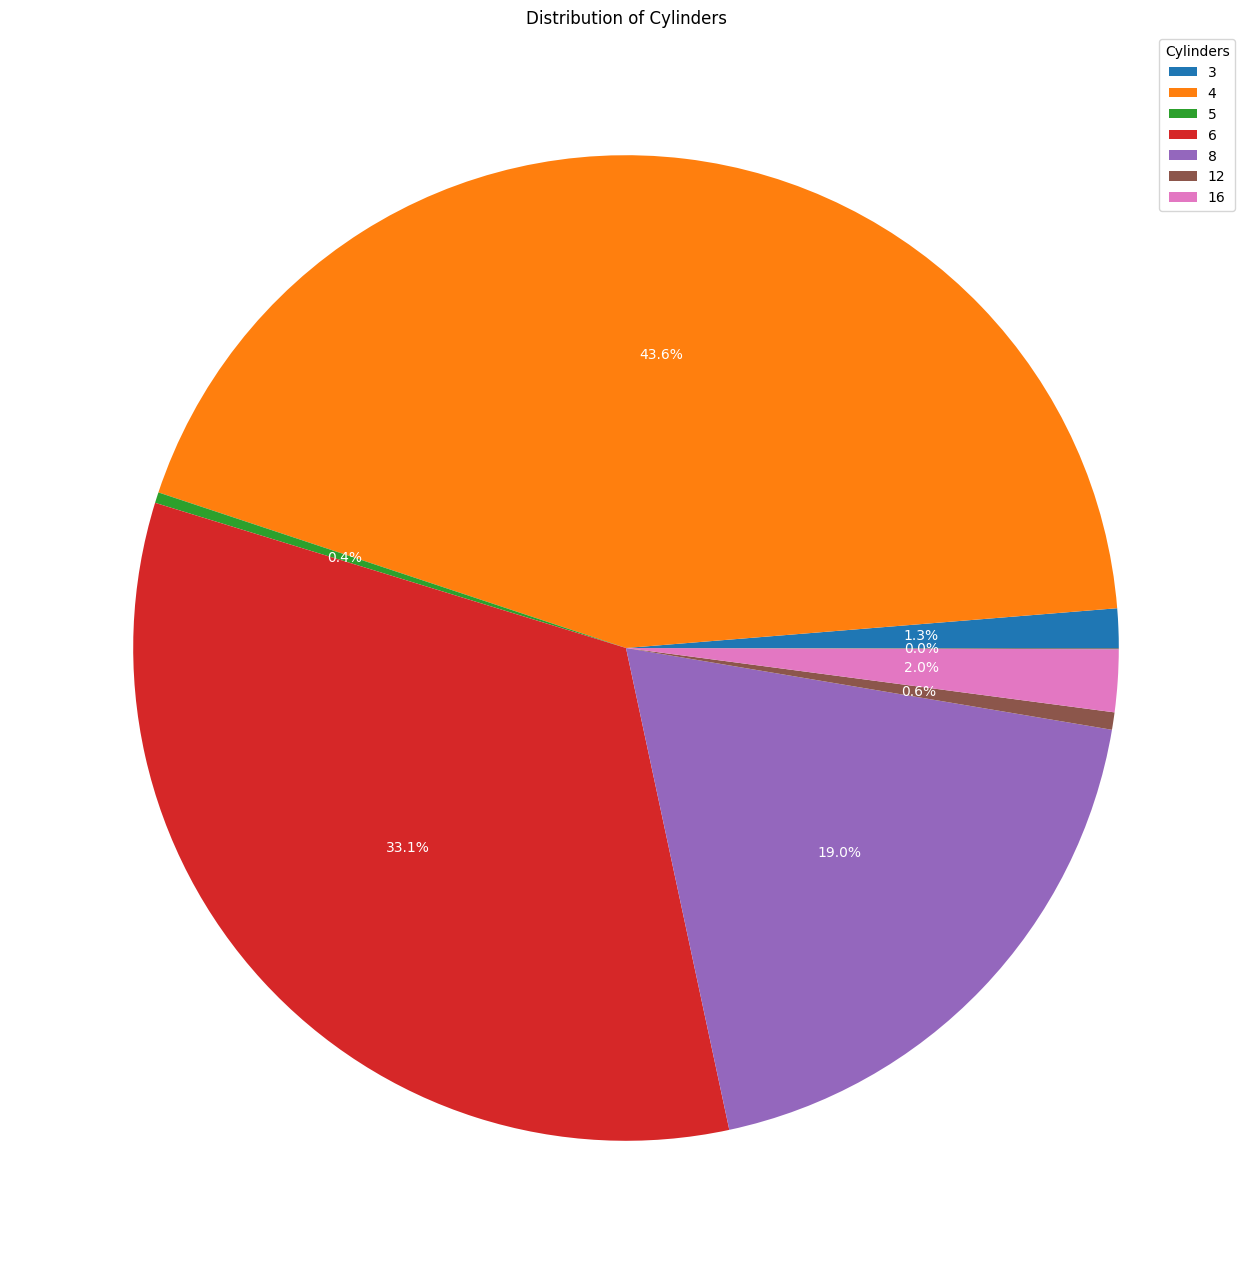

In [ ]:
labels = {
    3: '3 Cylinders',
    4: '4 Cylinders',
    5: '5 Cylinders',
    6: '6 Cylinders',
    8: '8 Cylinders',
    12: '12 Cylinders',
    16: '16 Cylinders'
}
plt.figure(figsize=(16, 16))
#https://www.w3schools.com/python/matplotlib_pie_charts.asp
wedges, _, autotexts = plt.pie(data.groupby("Cylinders")["Cylinders"].count(), autopct='%1.1f%%', labels=[None]*len(data.groupby("Cylinders")["Cylinders"].count())) #labels=[None]*len() this was used with the help of ChatGPT at 17/06/2025 to show the labels in distinct values
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(wedges, labels, title="Cylinders")
plt.title('Distribution of Cylinders')
plt.show()

From the above pie chart we can see that the 76.7% of the cars in our dataset have 4 or 6 cylinder while a smaller portion of them, have 8 cylinders 19%.
The rest of the cars have 5 , 10, 12  or 16 cylinders, but they are tiny portions of the dataset 4.3%

Regarding the Cyclinders the Visualization is easier since their values are distinct. However regarding the Engine Size in liters,most of the engines are 2, 3, 4 or more liters, however some of them are 2.4 or 6.2 etc., thus we need to see the all the Engine Size on our dataset, to see they are distributed across the dataset.

Text(0, 0.5, 'Number of Cylinders')

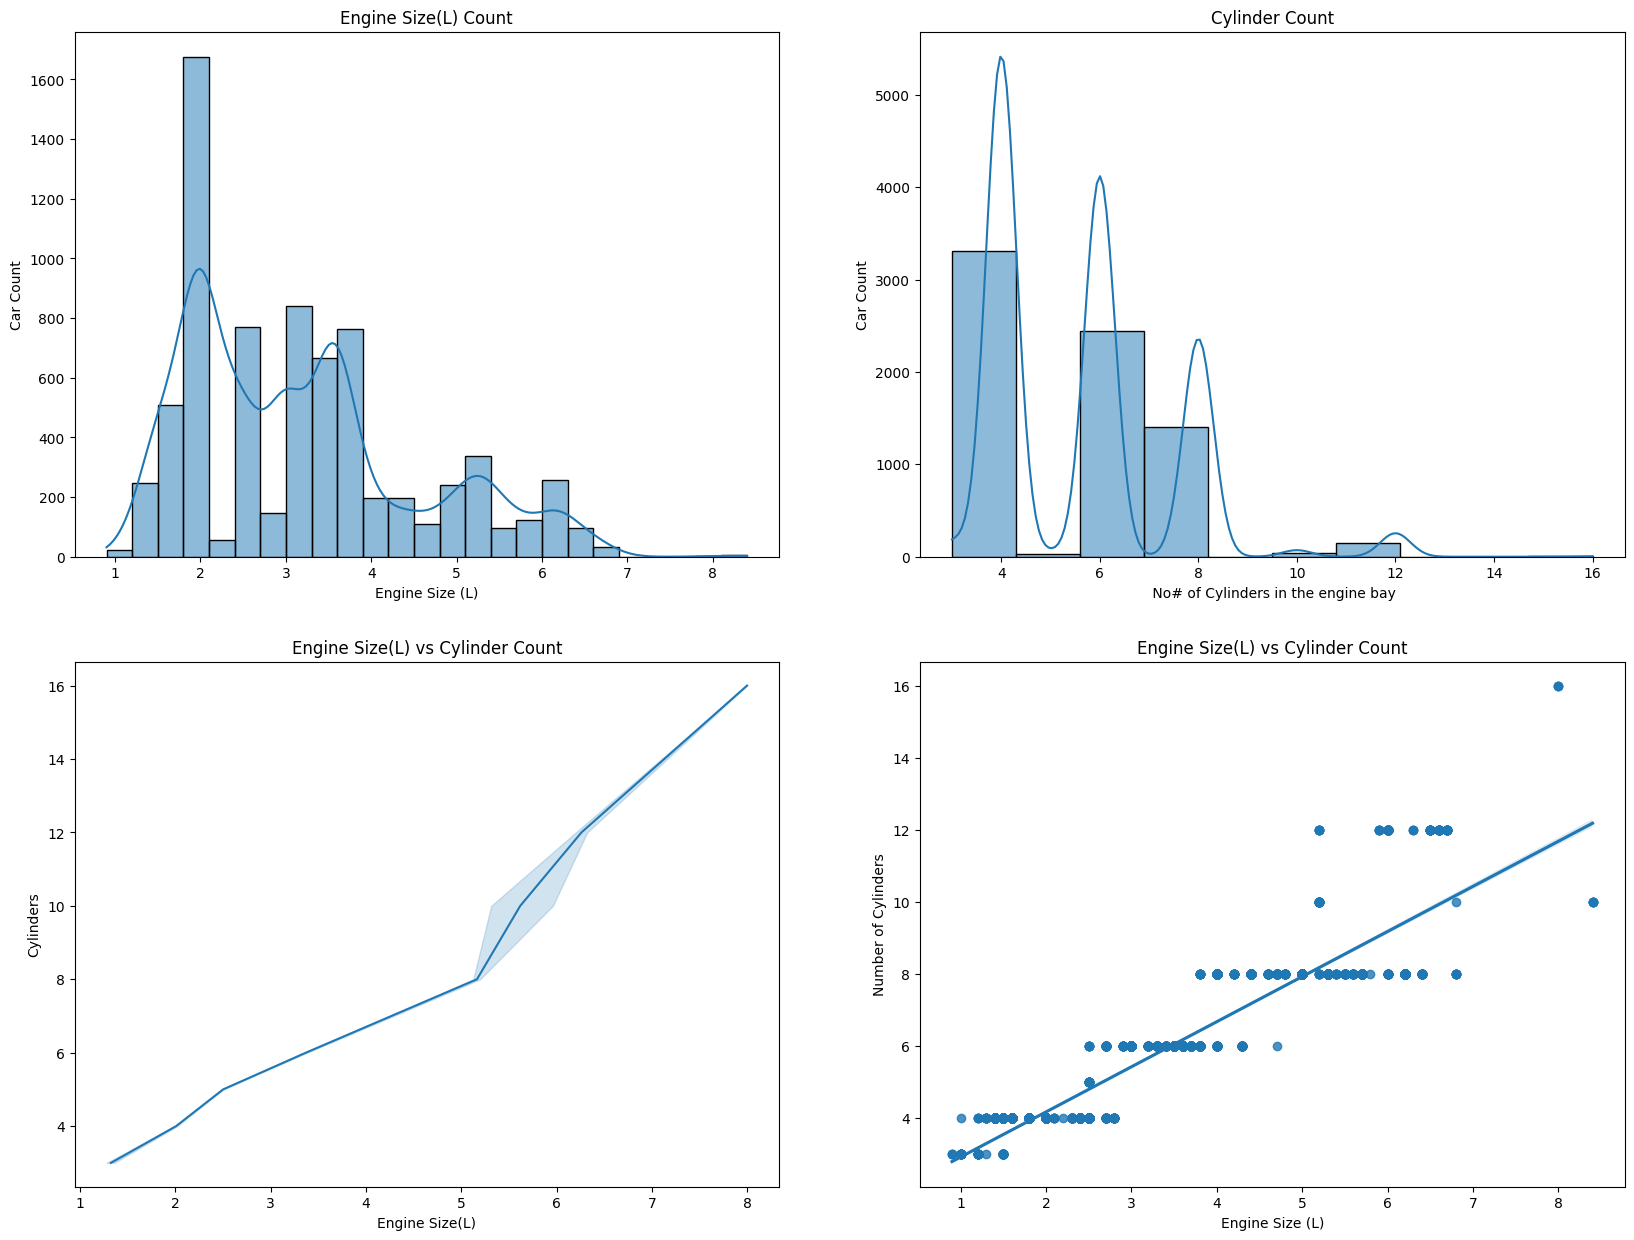

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
sns.histplot(data=data, x="Engine Size(L)",  bins =25, ax = axes[0][0], kde= True)
axes[0][0].set_title('Engine Size(L) Count')
axes[0][0].set_xlabel('Engine Size (L)')
axes[0][0].set_ylabel('Car Count')

sns.histplot(data=data, x="Cylinders", ax = axes[0][1], bins = 10, kde= True)
axes[0][1].set_title('Cylinder Count')
axes[0][1].set_xlabel(' No# of Cylinders in the engine bay')
axes[0][1].set_ylabel('Car Count')

sns.lineplot(data=data, x="Engine Size(L)", y="Cylinders", orient="y", ax = axes[1][0])
axes[1][0].set_title('Engine Size(L) vs Cylinder Count')

sns.regplot(data=data, x="Engine Size(L)", y="Cylinders", ax = axes[1][1])
axes[1][1].set_title('Engine Size(L) vs Cylinder Count')
axes[1][1].set_xlabel('Engine Size (L)')
axes[1][1].set_ylabel('Number of Cylinders')

From the above diagrams we can see a linear increase between cylinder number and Engine Size. Also by the first two histograms, we can confirm that the largest cluster of the cars on our dataset are between 2-3 liters and 4 -6 cylinders

# Does Automatic and Manual Cars are equally distributed to the Dataset?

Next part that we should focus is the transmission type that is part of the engine, to see later on which vehicles emmit more Carbon Dioxide (CO2) to the atmoshpere

As we have seen earlier, the transmission type is stored in the Dataset by the Transmission Box name (e.g., AS6). Every transmission that starts with A refers to Automatic Transmission, while M stands for a Manual Transmission.
We need to transform the transmission type to more distinct values (Engineer a new Feature), Manual and Automatic, to help us with the Visualization. So we will create another column in our Dataset that will represent it, to later visualize the Fuel Consumption between automatic and manual

In [ ]:
data_new = data.copy() # We create a new copy of the original data set to apply the new features and keep the original data intact
data_new['Transmission Type'] = data_new['Transmission'].apply(lambda x: 'Automatic' if 'A' in x else 'Manual')
data_new.groupby("Transmission Type")["Transmission Type"].count()


,Transmission Type
Transmission Type,
Automatic,6200
Manual,1185


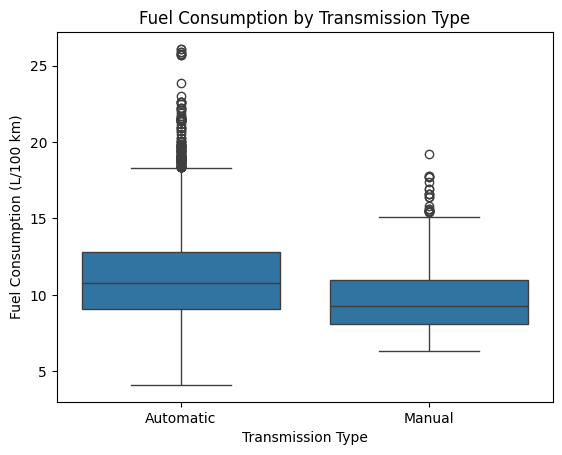

In [ ]:
sns.boxplot(data= data_new, y= 'Fuel Consumption Comb (L/100 km)',x = 'Transmission Type')
plt.title('Fuel Consumption by Transmission Type')
plt.suptitle('')
plt.xlabel('Transmission Type')
plt.ylabel('Fuel Consumption (L/100 km)')
plt.show()

We can conclude from a first look that on the Combined Fuel Consumption, the cars with the Automatic Transmission have slightly more consumption than the manual ones. Also, the automatics seem to have more outliers in relation to the manuals.  However, the manuals are outnumbered in the Dataset by approximately 6 : 1 ratio by the Automatics. Then, that means that for a single record of a car with a manual transmission, so we have six records of a car with an automatic.
So, since this is imbalanced, we will have to see how many cylinders and displacement the manual ones have, and if it is equally distributed to make for the correlation between records

# Does automatics have more displacment and cylinders across samples than its manual counterparts, to justify the difference in the consumptions?

In [ ]:
data_new.groupby(["Transmission Type", "Cylinders"])["Cylinders"].count().unstack()

Cylinders,3,4,5,6,8,10,12,16
Transmission Type,,,,,,,,
Automatic,55.0,2458.0,23.0,2180.0,1299.0,32.0,150.0,3.0
Manual,40.0,762.0,3.0,266.0,103.0,10.0,1.0,NaN


In [ ]:
data_new.groupby("Transmission Type")["Engine Size(L)"].describe()

,count,mean,std,min,25%,50%,75%,max
Transmission Type,,,,,,,,
Automatic,6200.0,3.274968,1.344146,0.9,2.0,3.0,4.0,8.0
Manual,1185.0,2.558903,1.243425,1.0,1.8,2.0,3.0,8.4


With the above statistical analysis of the grouping with the new feature, we can see from the numbers that in the first quarter of the dataset (25%), Manuals are outnumbered by Automatic cars, which they dominated to the common values (4-6 Cylinders) and to the rest of the dataset.


In [ ]:
means_transm = data_new.groupby("Transmission Type")["Engine Size(L)"].mean()
print(means_transm)

Transmission Type
Automatic    3.274968
Manual       2.558903
Name: Engine Size(L), dtype: float64


In [ ]:
percent_bigger = ((means_transm["Automatic"] - means_transm["Manual"]) / means_transm["Manual"]) * 100
print(f"Automatic engine sizes are {percent_bigger:.1f}% larger than manuals on average, across the dataset.")

Automatic engine sizes are 28.0% larger than manuals on average, across the dataset.



For the Engine Size (L), on the first quarter of the dataset, their displacements are slightly different(10%), while for the next 50% of the dataset Automatics have more Engine Size than Manuals, with discrepancies of 25-33%. Across the whole dataset this difference is on average at 28%.

Below is a more clear end user visualization of the above conclusions

Text(0, 0.5, 'Number of Cylinders')

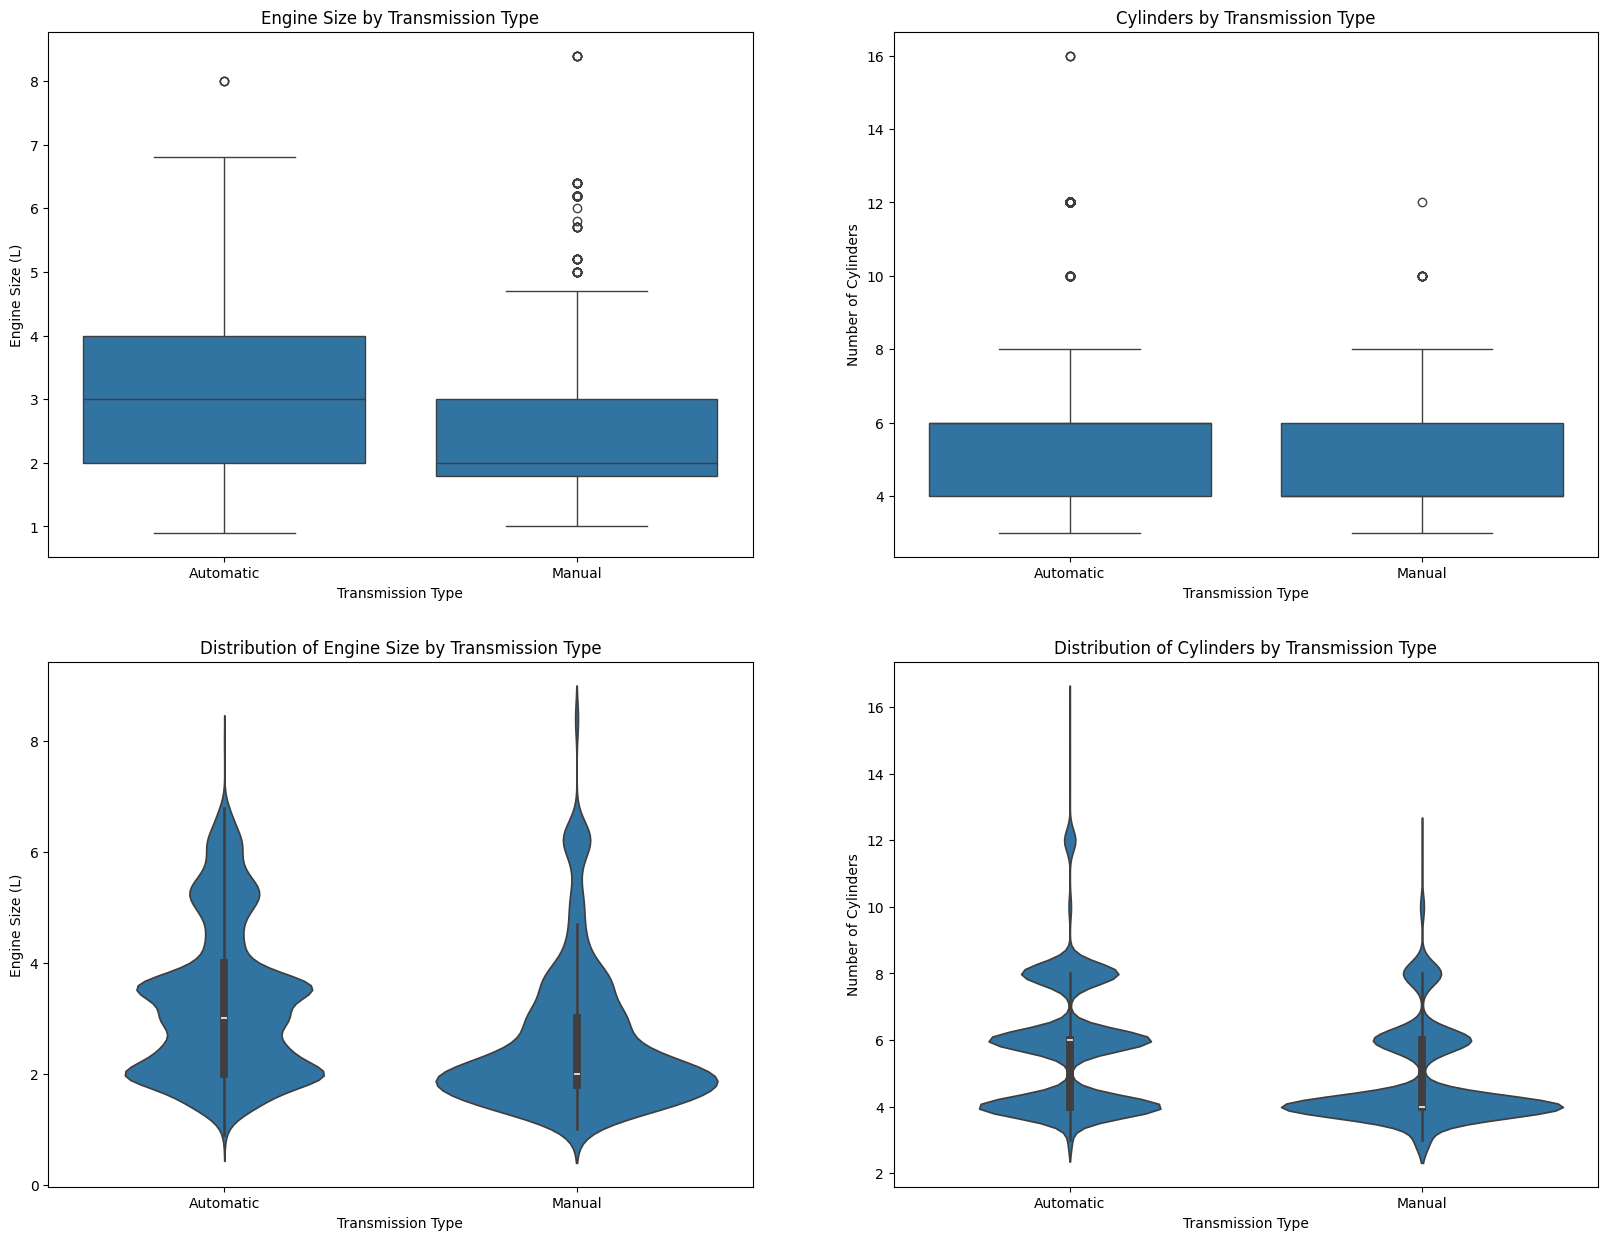

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
sns.boxplot(data= data_new, y='Engine Size(L)', x='Transmission Type', ax=axes[0][0])
axes[0][0].set_title('Engine Size by Transmission Type')
axes[0][0].set_xlabel('Transmission Type')
axes[0][0].set_ylabel('Engine Size (L)')

sns.boxplot(data= data_new, y='Cylinders', x='Transmission Type', ax=axes[0][1])
axes[0][1].set_title('Cylinders by Transmission Type')
axes[0][1].set_xlabel('Transmission Type')
axes[0][1].set_ylabel('Number of Cylinders')

sns.violinplot(data= data_new, y='Engine Size(L)', x='Transmission Type', ax=axes[1][0])
axes[1][0].set_title('Distribution of Engine Size by Transmission Type')
axes[1][0].set_xlabel('Transmission Type')
axes[1][0].set_ylabel('Engine Size (L)')

sns.violinplot(data= data_new, y='Cylinders', x='Transmission Type', ax=axes[1][1])
axes[1][1].set_title('Distribution of Cylinders by Transmission Type')
axes[1][1].set_xlabel('Transmission Type')
axes[1][1].set_ylabel('Number of Cylinders')

From the Box Plots and Violin Plots, we can clearly see that automatic transmission vehicles exhibit a more symmetric "normal" distribution of engine sizes between 2 and 4 liters. In contrast, manual transmission vehicles tend to cluster more tightly between 2 and 3 liters, with their presence vanishing a lot as engine size increases. While automatics remain equally distributed up to around 3.5 liters, their frequency declines beyond this point. Overall, automatics have a broader range and they are more evenly distributed range across higher engine sizes, probably because we have more samples, whereas manuals degrade significantly as engine displacement grows.


The same does not apply for cylinder number where the automatics and manuals are clustered between 4-6 cylinders, and considered a normal value. Automatics specifically have enough samples in 8-cylinder engines. On the other hand, due to fewer samples, manuals are concentrated across cylinders, with the majority being found in 4-cylinder cars, and then in 6-cylinder cars. Where the manulas degrade significantly is above 6 cylinders.

It is worth noting that for manual cars, a record with Engine Size above 4.8 Liters, and 8 cylinders is considered an excpetion of the rule, while for automatics the Engine size has a larger sample space that can rech up to 6.8 Liters with the same number of cylinders



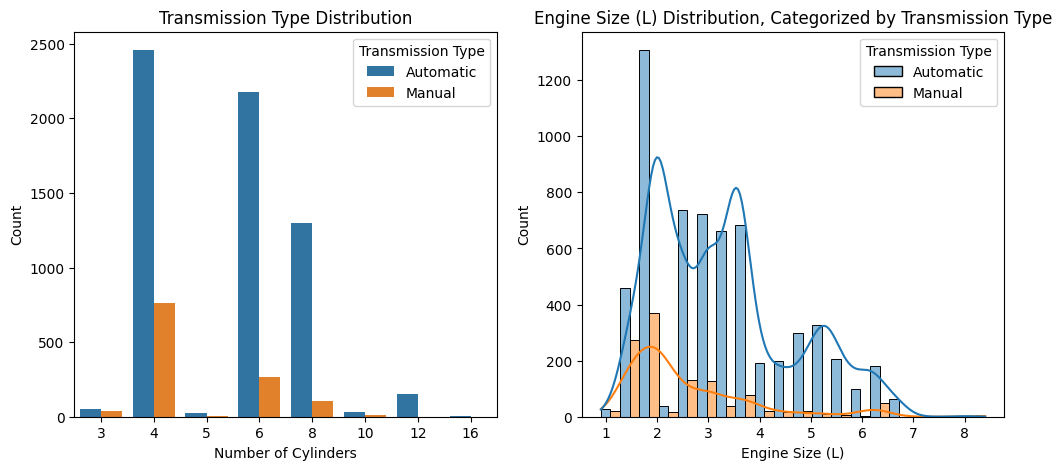

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data= data_new, x="Cylinders", hue = "Transmission Type", ax = axes[0])
axes[0].set_title ('Transmission Type Distribution')
axes[0].set_xlabel('Number of Cylinders')
axes[0].set_ylabel('Count')

plt.xlabel('Transmission Type')
sns.histplot(data= data_new, x="Engine Size(L)", hue="Transmission Type" ,bins=20, ax=axes[1], multiple="dodge" , kde=True)
axes[1].set_title('Engine Size (L) Distribution, Categorized by Transmission Type')
axes[1].set_xlabel('Engine Size (L)')
axes[1].set_ylabel('Count')

plt.show()

Note: Countplot was used for Cylinder Size due to their distinc values, and the histplot was used for the Engine Size due to continuos values

Below we can see more clearly where the largest statistical sample from each Transmission Type (Automatic or Manual) is concentrated with relation to the total samples per Transmission Type

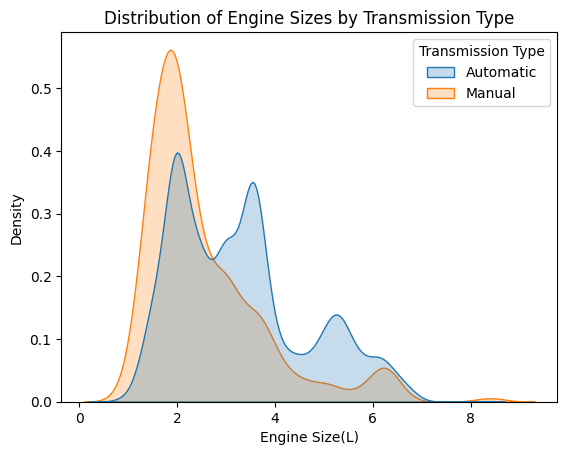

In [ ]:
sns.kdeplot(data=data_new, x="Engine Size(L)", hue="Transmission Type", fill=True, common_norm=False)
plt.title("Distribution of Engine Sizes by Transmission Type")
plt.show()

The conclusion is that yes, automatics due to their more samples in general , have a large range of Engine Types. They appear mostly in the range of 2.0 Liters to 3.5 liters and their enginges are 4-6 cylinders, while having a respective amount of samples in 8.

In contrast, manual transmission vehicles—being far fewer in the dataset—are primarily clustered around 1.5 to 2.0 liters with 4-cylinder engines. There are some manual vehicles with larger engines, with 3.0 liters or more, but these are much less common, as shown above

# Does Dispalcement and No. of Cylinders and Transmission Type, have and effect on Combined Fuel Consumptions?

In [ ]:
data_new.groupby(['Cylinders', 'Transmission Type'])['Fuel Consumption Comb (L/100 km)'].mean().unstack()

Transmission Type,Automatic,Manual
Cylinders,,
3,7.580000,7.392500
4,8.858991,8.691732
5,10.273913,9.600000
6,11.575505,11.493609
8,14.440647,13.951456
10,15.143750,16.760000
12,16.329333,19.200000
16,22.200000,NaN


In [ ]:
print("Unique engine displacements \n")
print(data_new.groupby(['Engine Size(L)', 'Transmission Type'])['Fuel Consumption Comb (L/100 km)'].count().unique().size)
print("\n ------------------------------------")
data_new.groupby(['Engine Size(L)', 'Transmission Type'])['Fuel Consumption Comb (L/100 km)'].mean().unstack()

Unique engine displacements 

54

 ------------------------------------


Transmission Type,Automatic,Manual
Engine Size(L),,
0.9,6.833333,NaN
1.0,7.330000,6.812500
1.2,6.438462,6.550000
1.3,8.627273,NaN
1.4,8.057377,7.723596
1.5,7.538462,7.504688
1.6,7.761538,8.142500
1.8,7.572848,8.127692
2.0,9.057266,8.928947


From the above we can see that in some engine displacments there is no data either for automatic or manual, transimissions, this happerns because we have 54 different classes of Engine Dispalcements, for each diffente engine displacment. To address this we will have to create a new feature called "Engine Size" to better distribute our classes.
The classes will be Small Size Engine, Medium Size Engine and Large Size Engine.  

In [ ]:
def engine_size_categorical(l):
    if l <= 2.5:
        return "Small Size Engine"
    elif l <= 4:
        return "Medium Size Engine"
    else:
        return "Large Size Engine"

data_new["Engine Size Categorical"] = data_new["Engine Size(L)"].apply(engine_size_categorical)

In [ ]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Since the number of cylinders was not included in these new features, we need to identify outliers using a count plot to analyze cylinder appearances in the engine size characterization.

In [ ]:
data_new.groupby(['Engine Size Categorical', 'Cylinders'])['Cylinders'].mean().unstack()

Cylinders,3,4,5,6,8,10,12,16
Engine Size Categorical,,,,,,,,
Large Size Engine,NaN,NaN,NaN,6.0,8.0,10.0,12.0,16.0
Medium Size Engine,NaN,4.0,NaN,6.0,8.0,NaN,NaN,NaN
Small Size Engine,3.0,4.0,5.0,6.0,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Cylinders vs Engine Size, Colored by Transmission Type')

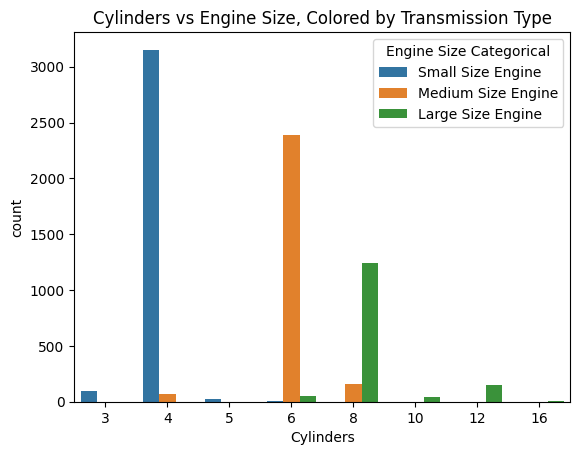

In [ ]:
sns.countplot(data= data_new, x="Cylinders", hue="Engine Size Categorical")
plt.title('Cylinders vs Engine Size, Colored by Transmission Type')

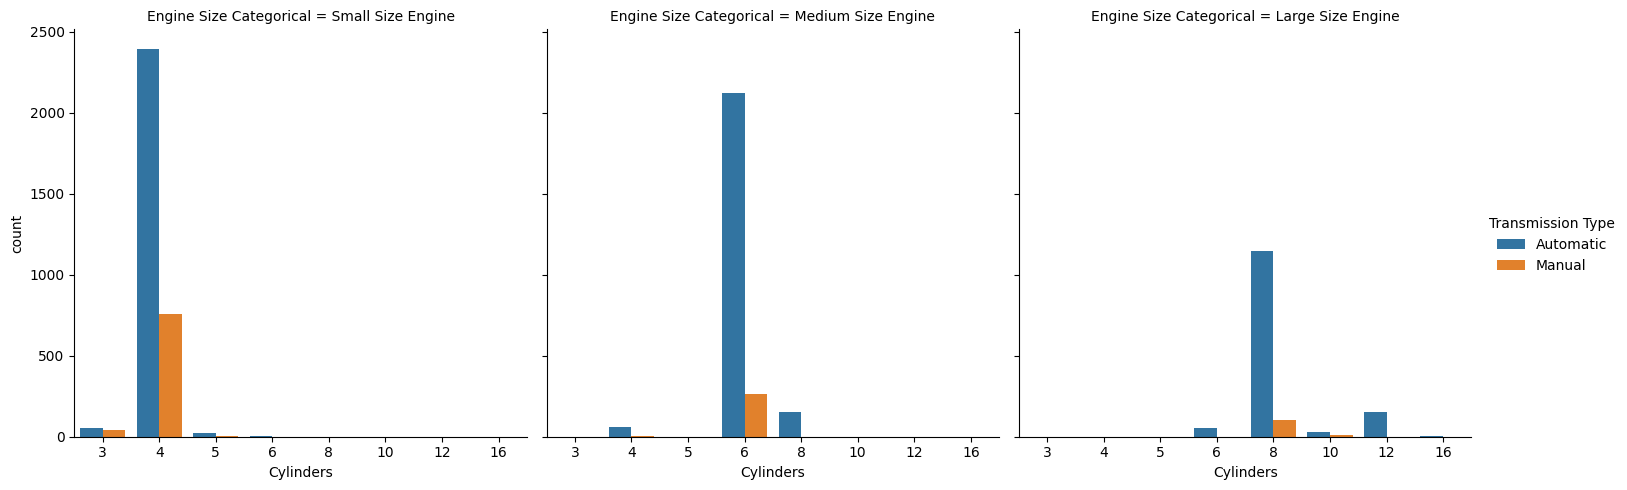

In [ ]:
sns.catplot(data=data_new,kind="count", x="Cylinders",hue="Transmission Type", col="Engine Size Categorical")

the linearity we discovered earlier between Engine Size and Cylinders can be shown herem the larger the size the more the cylinders, approximately 1 cylinder more per 1 lter change in Engine Size (L)
As expected there are some outliers, as can be seen on the large Engine Sizes, Some engines 4 liter have 6 cylinders or some engines below 4 liters have 8 cylinders.
Are these cars are of a specific brand with specific charachteristics?

In [ ]:
outlier_more = data_new[(data_new['Engine Size(L)'] >= 4) & (data_new['Cylinders'] == 6)]


outlier_less = data_new[(data_new['Engine Size(L)'] < 4) & (data_new['Cylinders'] >= 8)]

In [ ]:
print("4L+ engine, 6 cyl cars:")
print(outlier_more.groupby(['Make', 'Model', 'Vehicle Class']).size().sort_values(ascending=False))

print("\n<4L engine, 8+ cyl cars:")
print(outlier_less.groupby(['Make', 'Model', 'Vehicle Class']).size().sort_values(ascending=False))


4L+ engine, 6 cyl cars:
Make           Model                            Vehicle Class          
NISSAN         FRONTIER 4WD                     PICKUP TRUCK - SMALL       10
CHEVROLET      SILVERADO 4WD FFV                PICKUP TRUCK - STANDARD     6
               SILVERADO FFV                    PICKUP TRUCK - STANDARD     6
GMC            SIERRA 4WD FFV                   PICKUP TRUCK - STANDARD     6
               SIERRA FFV                       PICKUP TRUCK - STANDARD     6
NISSAN         FRONTIER                         PICKUP TRUCK - SMALL        5
TOYOTA         4RUNNER 4WD                      SUV - STANDARD              5
CHEVROLET      SILVERADO                        PICKUP TRUCK - STANDARD     4
PORSCHE        911 GT3                          TWO-SEATER                  4
CHEVROLET      SILVERADO 4WD                    PICKUP TRUCK - STANDARD     4
GMC            SIERRA                           PICKUP TRUCK - STANDARD     4
               SIERRA 4WD                     

The over 4 Liter 6-cylinder group is made up primarily for pick-up trucks as seen above. This is likely due to engine designs because 6-cylinder engine is naturally balanced due to the even spacing of the cylinders. This balance reduces the need for additional components, such as balance shafts, that other engine configurations require. Their benefits can be seen in the following article
https://www.woodyfolsomchryslerdodgejeepramofvidalia.com/blog/inline-6-cylinders.htm

Porsche Cars are using also a 4.0 Liter engine Flat-six Engine(6 Cylinders) by desing.
https://en.wikipedia.org/wiki/Porsche_flat-six_engine

The below 4L, 8+ cylinder group is entirely Maserati. This is the Design Choice of the manufacturer, since these models are usign the Ferrari F154 engine which is a 3.8 Liter V8 natually aspired engine (no-turbo)
https://en.wikipedia.org/wiki/Ferrari_F154_engine

There are some exceptions of cource

Now let's analyze the initial question if the Engine Size and No. of Cylinders in relation to Transmission Type, have and effect on Combined Fuel Consumptions and CO2 emissions

In [ ]:
print("Fuel Consumption Average, grouped by Engine Size Categorical and Transmission\n")
print(data_new.groupby(['Engine Size Categorical', 'Transmission Type'])['Fuel Consumption Comb (L/100 km)'].count().unique().size)
print("\n ------------------------------------")
data_new.groupby(['Engine Size Categorical', 'Transmission Type'])['Fuel Consumption Comb (L/100 km)'].mean().unstack()

Fuel Consumption Average, grouped by Engine Size Categorical and Transmission

6

 ------------------------------------


Transmission Type,Automatic,Manual
Engine Size Categorical,,
Large Size Engine,14.866498,14.244248
Medium Size Engine,11.574337,11.502198
Small Size Engine,8.796734,8.609512


In [ ]:
print("CO2 Emissions Average, grouped by Engine Size Categorical and Transmission\n")
print(data_new.groupby(['Engine Size Categorical', 'Transmission Type'])['CO2 Emissions(g/km)'].count().unique().size)
print("\n ------------------------------------")
data_new.groupby(['Engine Size Categorical', 'Transmission Type'])['CO2 Emissions(g/km)'].mean().unstack()

CO2 Emissions Average, grouped by Engine Size Categorical and Transmission

6

 ------------------------------------


Transmission Type,Automatic,Manual
Engine Size Categorical,,
Large Size Engine,329.379161,331.097345
Medium Size Engine,264.855432,267.802198
Small Size Engine,203.848387,200.332916


Text(0.5, 1.0, 'Fuel Consumption vs Engine Size, Colored by Transmission Type')

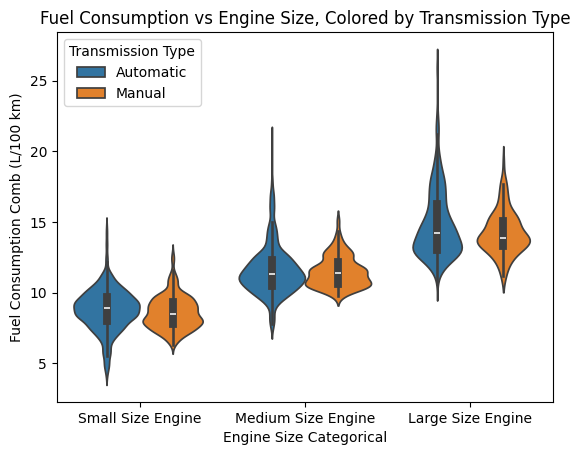

In [ ]:
sns.violinplot(data= data_new, x="Engine Size Categorical", y="Fuel Consumption Comb (L/100 km)", hue="Transmission Type")
plt.title('Fuel Consumption vs Engine Size, Colored by Transmission Type')

Text(0.5, 1.0, 'Fuel Consumption vs Engine Size, Colored by Transmission Type')

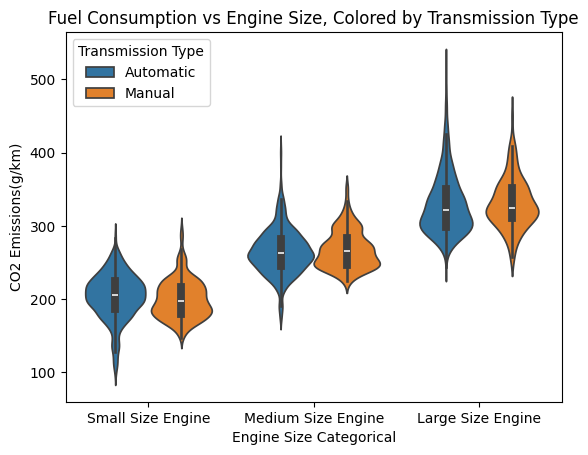

In [ ]:
sns.violinplot(data= data_new, x="Engine Size Categorical", y="CO2 Emissions(g/km)", hue="Transmission Type")
plt.title('Fuel Consumption vs Engine Size, Colored by Transmission Type')

From the analysis above, we conclude that the consumption levels are very similar for both transmission types. However, automatics have slightly higher consumption; howevwer, they emit less CO2 into the atmosphere.

# Does Fuel Type affect fuel consumptions and then the CO2 Emissions?

Next we need to see if the Fuel Types contrivutes to the CO2 Emissions on a car

In [ ]:
data_new.groupby( "Fuel Type").size()

,0
Fuel Type,
D,175
E,370
N,1
X,3637
Z,3202


From the above we can see that we have less cars that they are using Diesel(D) and Ethanol E85 (E) rather than Simple Gasoline(X) and Premium Gasoline(Z). For natural gas we have only one so we might not include it in our analysis

Now we need to categorize them by the Transmission Type

In [ ]:
data_new.groupby(["Transmission Type", "Engine Size Categorical"]).size().unstack(fill_value=0)

Engine Size Categorical,Large Size Engine,Medium Size Engine,Small Size Engine
Transmission Type,,,
Automatic,1382,2338,2480
Manual,113,273,799


In [ ]:
data_new.groupby(['Transmission Type', 'Engine Size Categorical', 'Fuel Type']).size().unstack(fill_value=0)

Fuel Type                                    D    E  N     X     Z
Transmission Type Engine Size Categorical                         
Automatic         Large Size Engine          0  177  0   446   759
                  Medium Size Engine       110  139  1   988  1100
                  Small Size Engine         54   50  0  1595   781
Manual            Large Size Engine          0    0  0    14    99
                  Medium Size Engine         0    0  0    61   212
                  Small Size Engine         11    4  0   533   251

Text(0.5, 1.0, 'Fuel Type Distribution by Transmission Type')

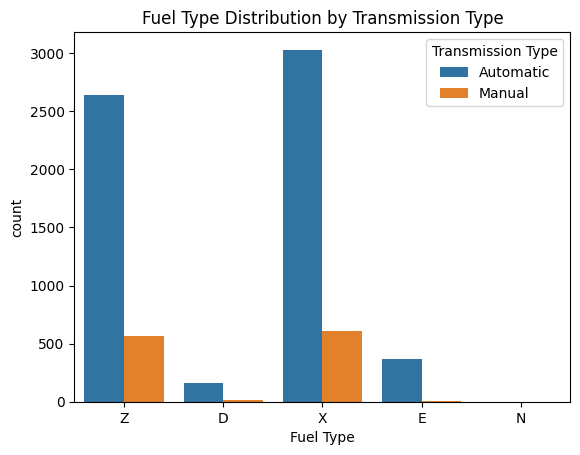

In [ ]:
sns.countplot(data= data_new, x="Fuel Type", hue="Transmission Type")
plt.title('Fuel Type Distribution by Transmission Type')

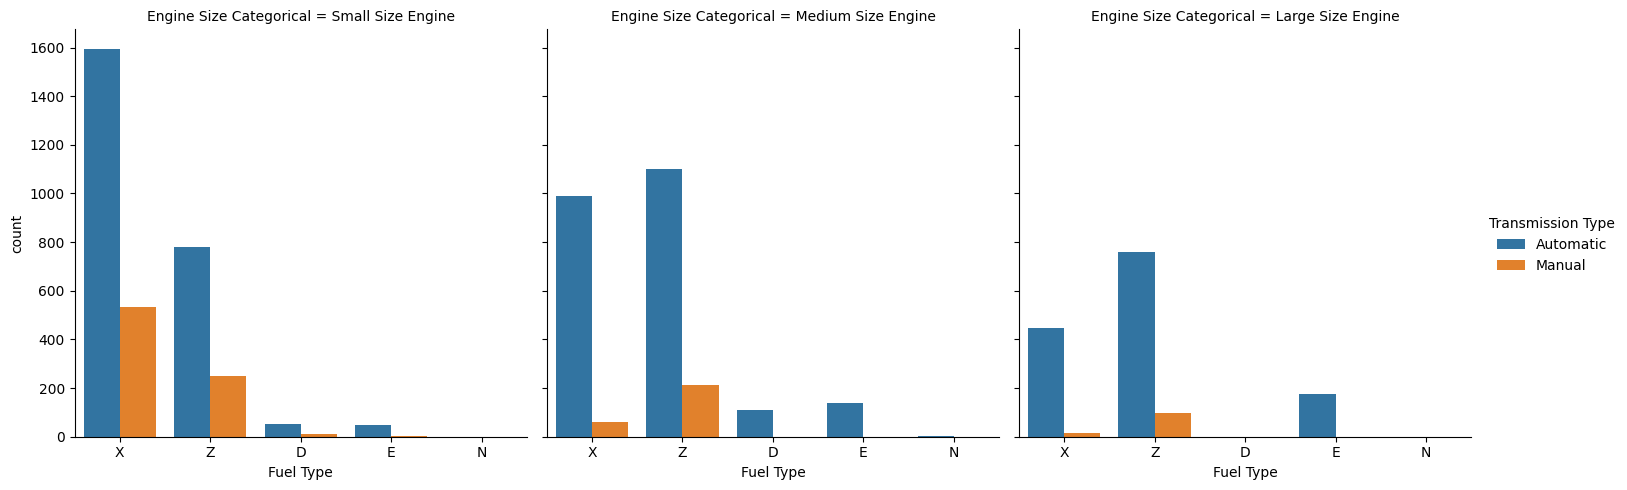

In [ ]:
sns.catplot(data=data_new,kind="count", x="Fuel Type",hue="Transmission Type", col="Engine Size Categorical", order=['X', 'Z', 'D', 'E', 'N'])

We can see again that the data is unbalanced, and more vehicles are using premium gasoline (Z), followed by standard gasoline(X). Diesel (D) and Ethanol (E) have much less samples and Natural Gas only one.


With the data we have we have to see which is the average emissions value for each Fuel Type

In [ ]:
fuel_optimality = data_new.groupby('Fuel Type')[['CO2 Emissions(g/km)', 'Fuel Consumption Comb (L/100 km)']].mean()
fuel_optimality = fuel_optimality.sort_values('CO2 Emissions(g/km)')
print(fuel_optimality)


           CO2 Emissions(g/km)  Fuel Consumption Comb (L/100 km)
Fuel Type                                                       
N                   213.000000                         12.700000
X                   235.119329                         10.084575
D                   237.548571                          8.835429
Z                   266.043410                         11.422767
E                   275.091892                         16.861351


In [ ]:
corr = data_new['CO2 Emissions(g/km)'].corr(data_new['Fuel Consumption Comb (L/100 km)'])
print(f"Correlation: {corr:.3f}")

Correlation: 0.918


In [ ]:
print(data_new['Engine Size(L)'].corr(data_new['Fuel Consumption Comb (L/100 km)']))

0.8170599932705072


In [ ]:
print(data_new['Engine Size(L)'].corr(data_new['CO2 Emissions(g/km)']))

0.8511446437900007


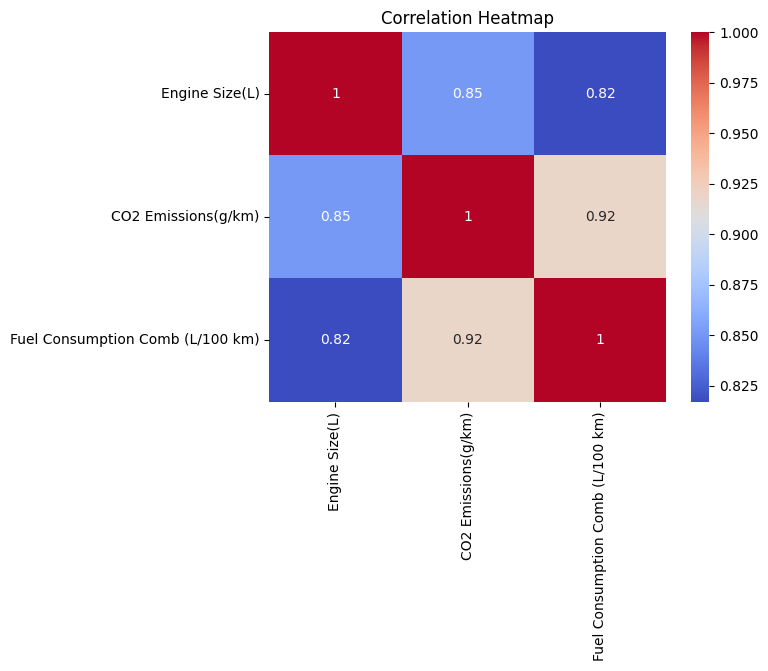

In [ ]:
sns.heatmap(data_new[['Engine Size(L)', 'CO2 Emissions(g/km)', 'Fuel Consumption Comb (L/100 km)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

All of the examined variables, engine size, fuel consumption, and CO2 emissions, are very strongly positively correlated, as shown in the heatmap. Among them, fuel consumption seems to be the main factor of CO2 emissions, with a correlation coefficient of 0.92, indicating that vehicles that consume more fuel per 100 km also emit significantly more CO2. Engine size is also strongly correlated with both fuel consumption and emissions; however is slightly less impactful than fuel consumption itself. This heatmap shows that emissions and fuel consumption are correlated, while engine displacement is also a big factor for both.

# Does Engine Size (L) affect the emissions of certain Fuel Types, disregarding their combined Consumption?

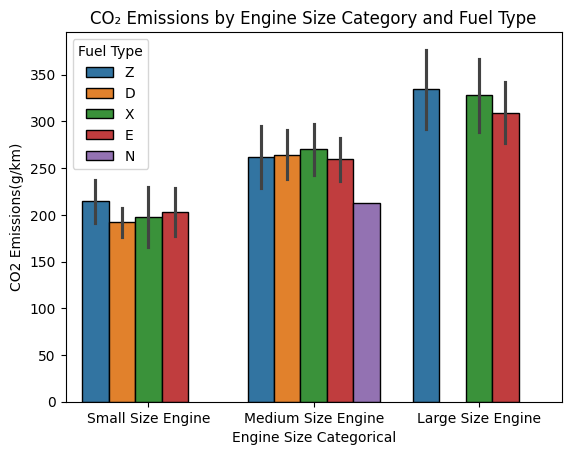

In [ ]:
sns.barplot(data= data_new, x='Engine Size Categorical', y='CO2 Emissions(g/km)', hue='Fuel Type', errorbar='sd',edgecolor='black')
plt.title('CO₂ Emissions by Engine Size Category and Fuel Type')
plt.show()

Text(0.5, 1.0, 'CO₂ Emissions vs. Fuel Consumption, for each Fuel Type')

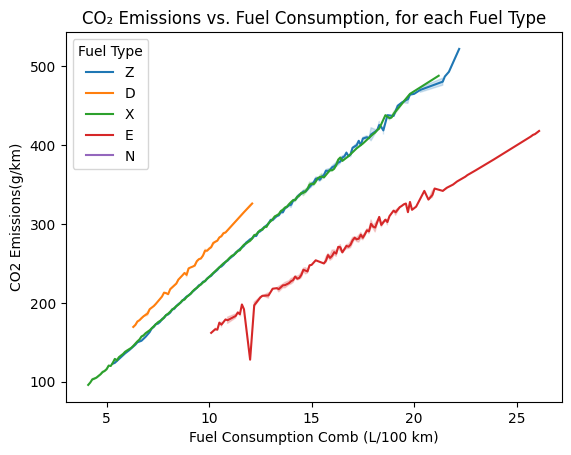

In [ ]:
sns.lineplot(data=data_new, x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', hue = "Fuel Type")
plt.title('CO₂ Emissions vs. Fuel Consumption, for each Fuel Type')

Since there is a linearity between CO2 Emissions, as shown above, we can see the Diesel (D) seems to be the less efficient fuel, and Ethanol (E) being the the most effieicnt, since they emmit less CO2 for the same consumption, among its counter parts. The similarity of Standard Gasoline (X) and Premium Gasoline(Z). However, we need to examine if the Engine Displacement plays a role in that.

Text(0.5, 1.0, 'CO₂ Emissions by Fuel Type')

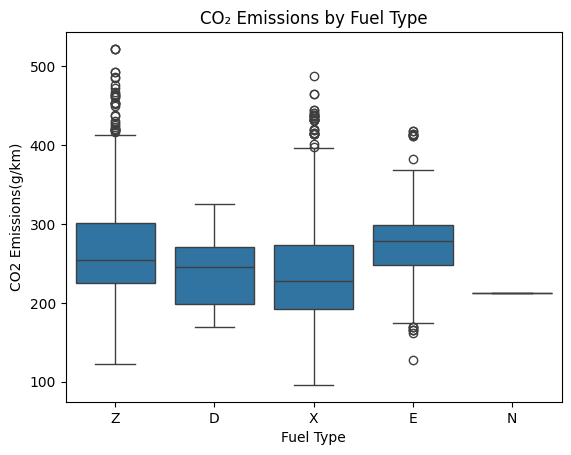

In [ ]:
sns.boxplot(data=data_new, x='Fuel Type', y='CO2 Emissions(g/km)')
plt.title('CO₂ Emissions by Fuel Type')

Text(0.5, 1.0, 'Engine Displacemnt per Fuel Type')

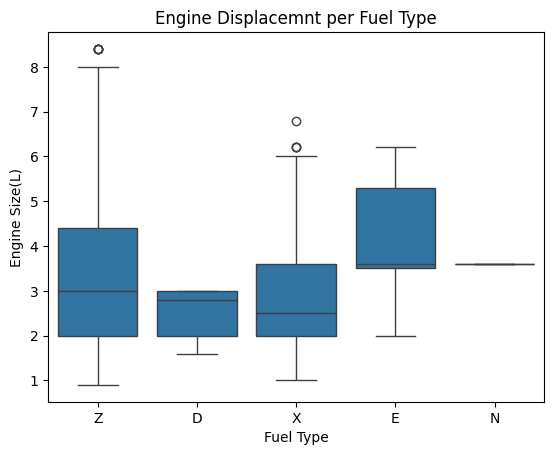

In [ ]:
sns.boxplot(data=data_new, x='Fuel Type', y='Engine Size(L)')
plt.title('Engine Displacemnt per Fuel Type')

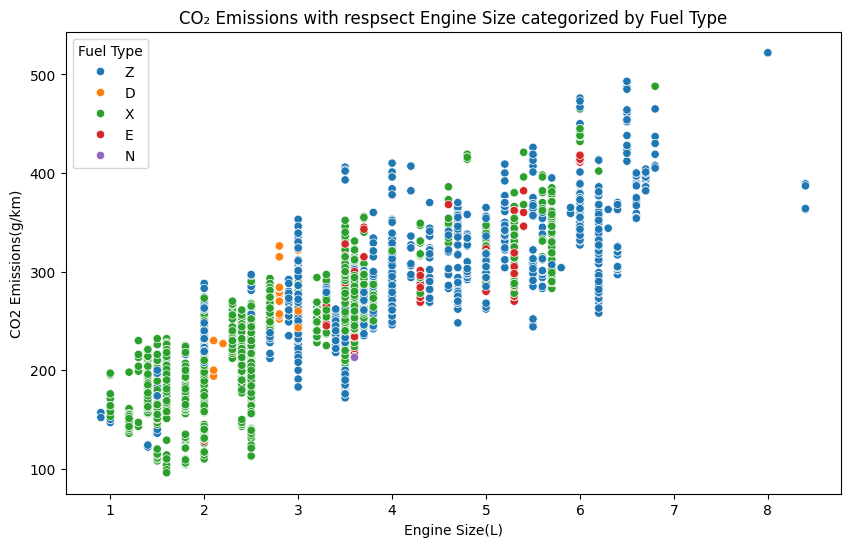

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data= data_new, x='Engine Size(L)', y='CO2 Emissions(g/km)', hue='Fuel Type')
plt.title('CO₂ Emissions with respsect Engine Size categorized by Fuel Type')
plt.show()

In a closer examination, we can see that most samples of Normal Gasoline (X) are clustered in the range of 1.0 - 3.5 Liters, and a small number appear in the range between 5-6 Liters. While Premium Gasoline Vehicles are less common in engines below 3.0 Liters, they are equally distributed up to 7.0 Liters.

In conclusion, premium gasoline (Z) appears to be less optimal; however, it is used in high-displacement cars, with more Cylinders (6) and Engine Size (3.0 L), while standard gasoline (X) is used in smaller-displacement cars.

The dataset includes fewer examples of Ethanol (E) and Diesel (D) engines. However, we can conclude that diesel engines are generally less efficient because they are typically found in vehicles with low to mid displacements and lower consumption and emmit more CO2. In contrast, Ethanol engines tend to be in vehicles with larger engine sizes. Ethanol engines also have the lowest emissions, although they generally have higher fuel consumption on average.

# Does vehicle class plays a role in the emissions?

In [ ]:
data_new.groupby('Vehicle Class')['Vehicle Class'].count()

,Vehicle Class
Vehicle Class,
COMPACT,1022
FULL-SIZE,639
MID-SIZE,1133
MINICOMPACT,326
MINIVAN,80
PICKUP TRUCK - SMALL,159
PICKUP TRUCK - STANDARD,538
SPECIAL PURPOSE VEHICLE,77
STATION WAGON - MID-SIZE,53


In [ ]:
data_new.groupby('Vehicle Class')[['Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']].mean().sort_values('Fuel Consumption Comb (L/100 km)', ascending=False)

,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
Vehicle Class,,
VAN - PASSENGER,19.192424,397.212121
VAN - CARGO,18.718182,361.500000
PICKUP TRUCK - STANDARD,13.880855,301.513011
SUV - STANDARD,13.650204,304.836735
MINIVAN,11.935000,262.312500
TWO-SEATER,11.921304,277.454348
PICKUP TRUCK - SMALL,11.717610,278.968553
FULL-SIZE,11.633646,263.316119
SPECIAL PURPOSE VEHICLE,10.763636,237.597403


Text(0, 0.5, 'Vehicle Class')

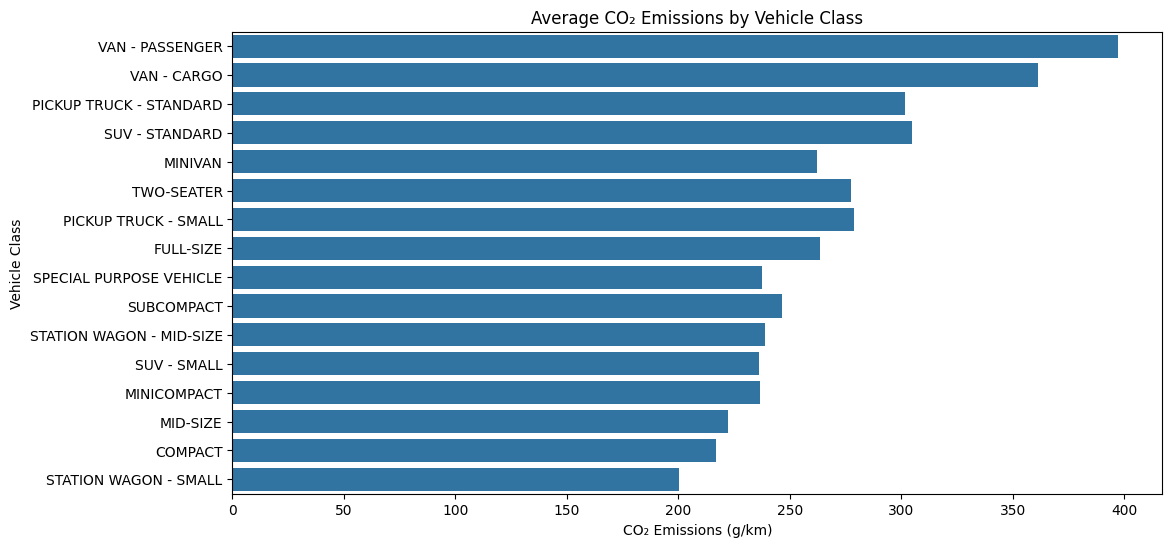

In [ ]:
v_class = data_new.groupby('Vehicle Class')[['Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']].mean().sort_values('Fuel Consumption Comb (L/100 km)', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=v_class.reset_index(),y='Vehicle Class',x='CO2 Emissions(g/km)') # Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

plt.title('Average CO₂ Emissions by Vehicle Class')
plt.xlabel('CO₂ Emissions (g/km)')
plt.ylabel('Vehicle Class')

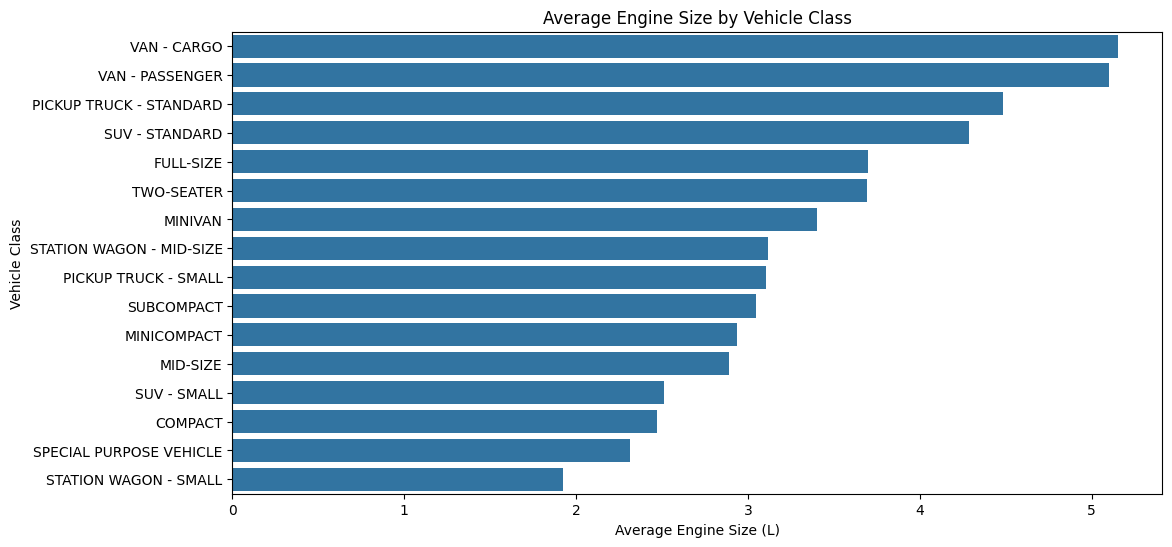

In [ ]:
engine_by_class = data_new.groupby('Vehicle Class')['Engine Size(L)'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(y=engine_by_class.index, x=engine_by_class.values)
plt.title('Average Engine Size by Vehicle Class')
plt.xlabel('Average Engine Size (L)')
plt.ylabel('Vehicle Class')
plt.show()

Vehicle class is highly correlated to engine size, with larger classes (like SUVs and pickups) typically having bigger engines. This results in higher average fuel consumption and CO2 emissions for these classes. Visualization shows that as engine size increases within each vehicle class, fuel consumption and emissions also rise, confirming engine size as a key factor in the environmental impact of different car types.

# Which car Fuel Types are consuming the most Fuel(City or Highway), what is the consumption difference percentage between City and Highway, and which consumption form of these two affects the combined consumption?

In [ ]:
mean_consumption = data_new.groupby('Fuel Type')[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']].mean()
print(mean_consumption)

           Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  \
Fuel Type                                                                      
D                                 10.057714                         7.333714   
E                                 19.429730                        13.720000   
N                                 15.200000                         9.500000   
X                                 11.412483                         8.459747   
Z                                 13.197533                         9.255340   

           Fuel Consumption Comb (L/100 km)  
Fuel Type                                    
D                                  8.835429  
E                                 16.861351  
N                                 12.700000  
X                                 10.084575  
Z                                 11.422767  


In [ ]:
mean_consumption['% Difference (City vs Hwy)'] = ((mean_consumption['Fuel Consumption City (L/100 km)'] - mean_consumption['Fuel Consumption Hwy (L/100 km)']) / mean_consumption['Fuel Consumption Hwy (L/100 km)'] * 100).round(1)
print(mean_consumption[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', '% Difference (City vs Hwy)']])

           Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  \
Fuel Type                                                                      
D                                 10.057714                         7.333714   
E                                 19.429730                        13.720000   
N                                 15.200000                         9.500000   
X                                 11.412483                         8.459747   
Z                                 13.197533                         9.255340   

           % Difference (City vs Hwy)  
Fuel Type                              
D                                37.1  
E                                41.6  
N                                60.0  
X                                34.9  
Z                                42.6  


In [ ]:
mean_consumption['Comb - City'] = (mean_consumption['Fuel Consumption Comb (L/100 km)'] - mean_consumption['Fuel Consumption City (L/100 km)']).abs() #used chatgpt on 23/06/2025 to create the syntax
mean_consumption['Comb - Hwy'] = (mean_consumption['Fuel Consumption Comb (L/100 km)'] - mean_consumption['Fuel Consumption Hwy (L/100 km)']).abs()#used chatgpt on 23/06/2025 to create the syntax
mean_consumption['Closer to'] = np.where(mean_consumption['Comb - City'] < mean_consumption['Comb - Hwy'],'City', 'Highway') #used chatgpt on 23/06/2025 to create the syntax
print(mean_consumption[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Closer to']]) #used chatgpt on 23/06/2025 to create the syntax

           Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  \
Fuel Type                                                                      
D                                 10.057714                         7.333714   
E                                 19.429730                        13.720000   
N                                 15.200000                         9.500000   
X                                 11.412483                         8.459747   
Z                                 13.197533                         9.255340   

           Fuel Consumption Comb (L/100 km) Closer to  
Fuel Type                                              
D                                  8.835429      City  
E                                 16.861351      City  
N                                 12.700000      City  
X                                 10.084575      City  
Z                                 11.422767      City  


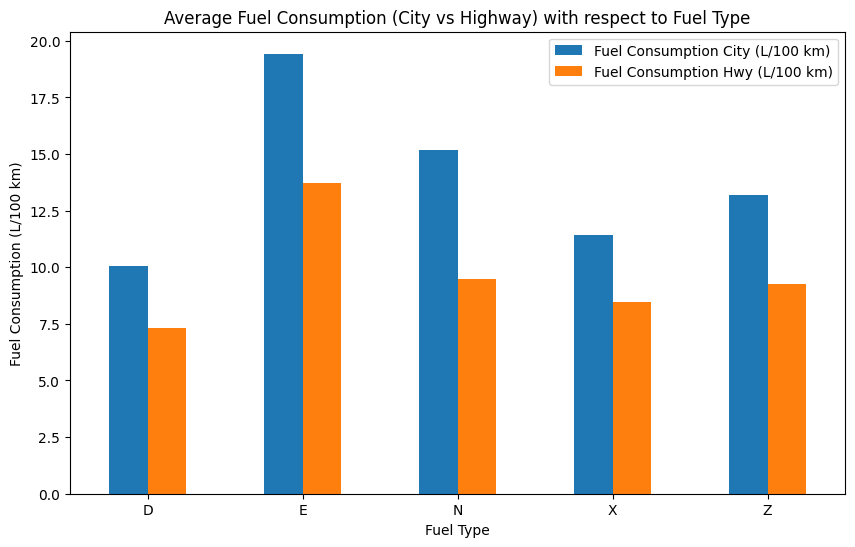

In [ ]:
fuels_cty_hgw = data_new.groupby('Fuel Type')[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']].mean()
fuels_cty_hgw.plot(kind='bar', figsize=(10,6))
plt.title('Average Fuel Consumption (City vs Highway) with respect to Fuel Type')
plt.ylabel('Fuel Consumption (L/100 km)')
plt.xticks(rotation=0)
plt.show()

We can conclude that Ethanol is the most Fuel Consuming fuel, followed by Premium Gasoline(Natural Gas (N) has only one record), and
that the fuel consumption is more on the City for all Fuel Types. It was also observed that City consumption is the most infulencial factor for the combined Fuel Consumptions of the cars.
It is also worth noting that some Fuel Types, have a higher difference ratio between City and Highway Consumption, however this is justified since cars that using specifc Fuel Types (e.g. Premium Gasoline Z) have higher displacements cars on their sample space and other lower (e.g. Diesel)

Portions of the code have been created by the use of ChatGPT. Each Line of code that was created by this LLM, has been commented and includes the date that was retrieved.
This method has been used only to resolve trivial problems with the syntax, and not to create the original concept of this analysis

Grammarly was also used to correct typos and syntactic mistakes